<a href="https://colab.research.google.com/github/Shrinithi04/Decomposing-Time-series-data-into-trend-and-seasonality/blob/main/TSA_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
trend = np.linspace(10, 50, 100)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, 100))
noise = np.random.randn(100) * 2
values = trend + seasonality + noise

df = pd.DataFrame({'Date': dates, 'Original_Value': values})
df.set_index('Date', inplace=True)


In [ ]:
decomposition = seasonal_decompose(df['Original_Value'], model='additive', period=30)
df['Trend'] = decomposition.trend
df['Seasonality'] = decomposition.seasonal
df['Residuals'] = decomposition.resid

In [ ]:
print("\nOriginal and Decomposed Data:")
print(df.head(20))


Original and Decomposed Data:
            Original_Value      Trend  Seasonality  Residuals
Date                                                         
2024-01-01       10.993428        NaN    -1.249297        NaN
2024-01-02       11.078072        NaN     1.441330        NaN
2024-01-03       13.995970        NaN    -1.364960        NaN
2024-01-04       17.075506        NaN    -2.513365        NaN
2024-01-05       14.864479        NaN     1.364591        NaN
2024-01-06       16.134193        NaN    -0.097407        NaN
2024-01-07       20.989076        NaN    -0.073619        NaN
2024-01-08       20.544742        NaN    -1.191953        NaN
2024-01-09       19.194165        NaN    -1.229252        NaN
2024-01-10       22.278979        NaN    -0.706195        NaN
2024-01-11       21.259328        NaN     0.875614        NaN
2024-01-12       22.173239        NaN     1.483434        NaN
2024-01-13       24.428729        NaN    -0.385370        NaN
2024-01-14       20.875973        NaN  

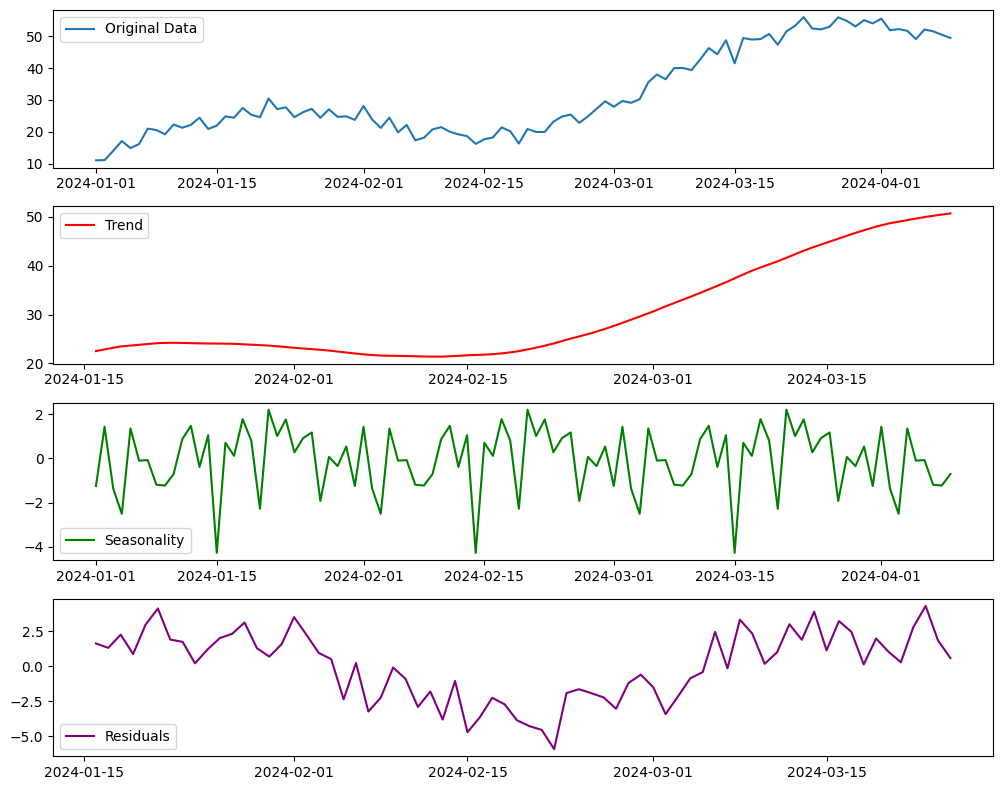

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['Original_Value'], label='Original Data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, df['Trend'], label='Trend', color='red')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, df['Seasonality'], label='Seasonality', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Residuals'], label='Residuals', color='purple')
plt.legend()

plt.tight_layout()
plt.show()